# Watermark Detection
**Martino Ferrari**


## Watermark Embedding and Channel modelling

After loading a gray scale image $x$ we were asked to embed a watermarm $w$ composed by $\{-1,+1\}$ uniformly distributed with a density of $θ_N=0.5$, $y=x+w$. The image is then *attacked* by an AWGN $z=\mathcal{N}(0,1)$, the resulting image $z=y+z$.


In [193]:
import numpy as np
from scipy import misc
import numpy as np
import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib as mpl 

mpl.rcParams['figure.figsize']=(6.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=300             #72 
mpl.rcParams['figure.subplot.bottom']=.1    #.125

def rgb2gray(rgb):
    """Convert an RGB image to a gray scale one.

    Args:
        rgb: original image

    Returns:
        grayscale image
    """
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = np.round(0.2989 * r + 0.5870 * g + 0.1140 * b)
    return gray.astype(int)


def loadimg(path):
    """Load an image and convert to an NP array
    
    Args:
        path: path to the image to load
        
    Returns:
        loaded image as NP array
    """
    return np.asarray(misc.imread(path))

def watermark(shape, density):

    w = np.random.random(shape)-0.5
    # undersample to density
    mask = np.random.random(shape)<(1-density)
    w[mask] = 0
    mask = w < 0 
    w[mask] = -1
    mask = w > 0
    w[mask] = +1
    return w

auto corrleation: 1.01


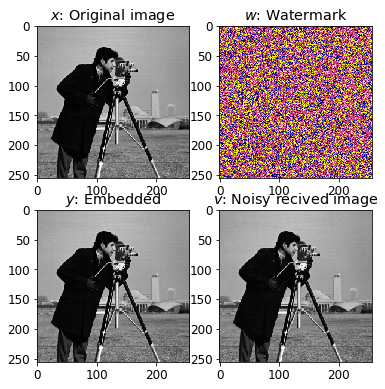

In [194]:
## Exercise 1.1 

x = loadimg("Cameraman.bmp")
density = 0.5

# generate w'
w = watermark(x.shape,density)
N_mask = x.size*density



sigma = np.sum(w*w)/N_mask
print(f"auto corrleation: {sigma:2.3}")

# enbed watermark
y = x + w

# generate noise
z = np.random.normal(0,1,x.shape)
# recived image
v = y + z


fig = plt.figure()
plt.subplot(221)
plt.title("$x$: Original image")
plt.imshow(x,cmap="gray")
plt.subplot(222)
plt.title("$w$: Watermark")
plt.imshow(w,cmap="plasma")
plt.subplot(223)
plt.title("$y$: Embedded")
plt.imshow(y,cmap="gray")
plt.subplot(224)
plt.imshow(v, cmap="gray")
plt.title("$v$: Noisy recived image")
plt.show()

The process is shown in the previous figure, to the human eyes is very difficult to see any diffrence between the 3 images $x$, $y$ and $v$ as both the watermark and the noise have low intensity. I tried so to see if in the frequency domain the difference is more evident.
The autocorrelation of $w$ is around 0.5 that is the average of $a\cdot a$ with $a \in[0,1]$ as in the case of the watermark $w$. 

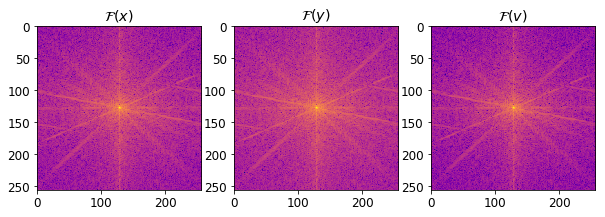

In [195]:
# convert to frequency domain 
X = np.fft.fftshift(np.fft.fft2(x))
Y = np.fft.fftshift(np.fft.fft2(y))
V = np.fft.fftshift(np.fft.fft2(v))

mpl.rcParams['figure.figsize']=(10.0,7)    #(6.0,4.0)

f = plt.figure()
plt.subplot(131)
plt.title("$\mathcal{F}(x)$")
plt.imshow(np.log(np.abs(X)),cmap="plasma")
plt.subplot(132)
plt.title("$\mathcal{F}(y)$")
plt.imshow(np.log(np.abs(Y)),cmap="plasma")
plt.subplot(133)
plt.title("$\mathcal{F}(v)$")
plt.imshow(np.log(np.abs(V)),cmap="plasma")

plt.show()

The diffrence is small as well in the frequency domain, however is possible to see the effects of the gaussian noise in the last sub plot. I tried then now to see if with stronger watermark and noise the difference are more remarkable:

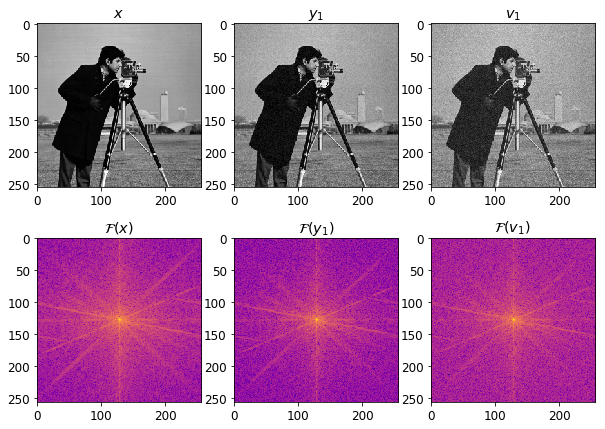

In [196]:
w1 = 10*watermark(x.shape,density)
# embeded 
y1 = x+w1

# generate noise
z1 = np.random.normal(0,10,x.shape)
# recived image
v1 = z1 + y1
# convert to frequency domain 
Y1 = np.fft.fftshift(np.fft.fft2(y1))
V1 = np.fft.fftshift(np.fft.fft2(v1))

mpl.rcParams['figure.figsize']=(10.0,7)    #(6.0,4.0)

f = plt.figure()
plt.subplot(231)
plt.title("$x$")
plt.imshow(x,cmap="gray")
plt.subplot(232)
plt.title("$y_1$")
plt.imshow(y1,cmap="gray")
plt.subplot(233)
plt.title("$v_1$")
plt.imshow(v1,cmap="gray")
plt.subplot(234)
plt.title("$\mathcal{F}(x)$")
plt.imshow(np.log(np.abs(X)),cmap="plasma")
plt.subplot(235)
plt.title("$\mathcal{F}(y_1)$")
plt.imshow(np.log(np.abs(Y1)),cmap="plasma")
plt.subplot(236)
plt.title("$\mathcal{F}(v_1)$")
plt.imshow(np.log(np.abs(V1)),cmap="plasma")

plt.show()

With a watermark with intensity of $\{-10,+10\}$ the watermark is sligthly more evident, as well with a noise $z_1=\mathcal{N}(0,10)$ the degradation is much more evident.  

## Non-blind watermark detection

In this simple detection case we suppose that the reciver has access to the original image $x$ and of course the key to generate the watermark $w$. The first step is so to extract the $\hat{w}=v-x$, and then compute the corelation of it with the original watermark $\rho=\frac{1}{N}\sum_{i=0}^{N-1}\hat{w}[i]\cdot w[i]$:

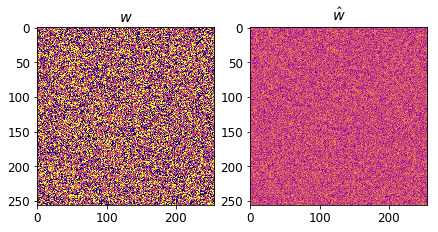

ρ = 1.01


In [197]:
# exercsie 2.1

# detected wmark 
wE = v-x

mpl.rcParams['figure.figsize']=(7.0,7)    #(6.0,4.0)

f = plt.figure()
plt.subplot(121)
plt.title("$w$")
plt.imshow(w,cmap="plasma")
plt.subplot(122)
plt.title("$\hat{w}$")
plt.imshow(wE,cmap="plasma")
plt.show()

# corrleation

rho = np.sum(wE*w)/N_mask
print(f"ρ = {rho:2.3}")


## Blind watermark detection

However in general the reciver doesn't have access to the original image, in this case the extraction of the watermark $\hat{w}$ is done using an extimation of the original image $\bar{v}$, $\hat{w}=v-\bar{v}$. As both $z$ and $w$ can be represented as noise the extimation $\bar{v}$ can be computed using a low pass filter $\bar{v}=h_{lp}*v$ or in the frequency domain as $\bar{V}=H_{lp}\cdot V$.

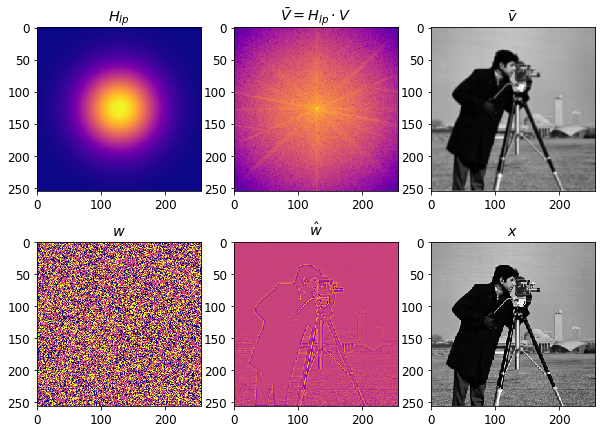

In [198]:
def _fftgauss(u,A,sigma):
    return A**(-(u**2/(2*sigma**2)))

def coords(shape,cx=0,cy=0):
    m, n = shape[:2]
    x = np.arange(m)[:,None]
    y = np.arange(n)
    mid_x, mid_y = (scipy.array(shape[:2]) - 1) / float(2)
    return ((y - mid_y-cx) ** 2 + (x - mid_x-cy) ** 2) ** 0.5

lowpass = np.vectorize(_fftgauss)

H = lowpass(coords(X.shape),50,80)
Ve= V*H
ve = np.fft.ifft2(np.fft.ifftshift(Ve))
we = v-np.abs(ve)

mpl.rcParams['figure.figsize']=(10.0,7)    #(6.0,4.0)

f = plt.figure()
plt.subplot(231)
plt.title("$H_{lp}$")
plt.imshow(H,cmap="plasma")
plt.subplot(232)
plt.title(r"$\bar{V}=H_{lp}\cdot V$")
plt.imshow(np.log(np.abs(Ve)),cmap="plasma")
plt.subplot(233)
plt.title(r"$\bar{v}$")
plt.imshow(np.abs(ve),cmap="gray")
plt.subplot(234)
plt.title("$w$")
plt.imshow(w,cmap="plasma")
plt.subplot(235)
plt.title("$\hat{w}$")
plt.imshow(we,cmap="plasma")
plt.subplot(236)
plt.title("$x$")
plt.imshow(x,cmap="gray")
plt.show()




Using a very weak low pass filter $H_{lp}=10^{-\frac{u^2}{2\cdot80^2}}$ is possible to obtain very good results. Using a stronger low pass filter will give worst results as the $\hat{w}$ will be dominate by the high-frequncy of the original image $x$, instead that on the watermark $w$ (and noise $z$). Is possible now to compute again the correlation $\rho$ as before:

In [199]:
# corrleation

rho = np.sum(we*w)/N_mask
print(f"ρ = {rho:2.3}")


ρ = 0.88


The difference between $\rho_{non-blind}=1.01$ and $\rho_{blind}=0.88$ is very small and that confirms the graphical evidence as well as the filter choice. However with stronger noise $z$ or more sofisticate attack (e.g.: the attacker could use the same filter to compute $\hat{w}$ and then substracting it to the image $y$) could affect more the watermark detection.

To understand better how the simple blind detector implemented perform I chose to do some statistical analysis confronting 200 watermarked images with 200 not watermarked and looking at the value of the correlation between $w$ and $\hat{w}$:  

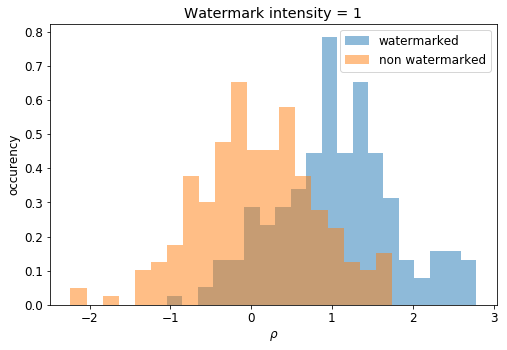

In [204]:
### H = lowpass(coords(X.shape),50,80)
stats_w  = []
stats_non_w = []
noise_signal_ratio = 1

for i in range(0,200):
    # generate w'
    w = noise_signal_ratio*watermark(x.shape, 0.5)
    
    # generate noise
    z = np.random.normal(0,1,x.shape)
    # recived image
    v = x + w + z
    V = np.fft.fft2(v)
    Ve= V*H
    ve = np.fft.ifft2(Ve)
    we = v-np.abs(ve)
    rho = np.sum(we*w)/N_mask
    stats_w.append(rho)

for i in range(0,200):
    
    w = noise_signal_ratio*watermark(x.shape, 0.5)

    # generate noise
    z = np.random.normal(0,1,x.shape)
    # recived image
    v = x + z
    V = np.fft.fft2(v)
    Ve= V*H
    ve = np.fft.ifft2(Ve)
    we = v-np.abs(ve)
    rho = np.sum(we*w)/N_mask
    stats_non_w.append(rho)

mpl.rcParams['figure.figsize']=(8.0,5)    #(6.0,4.0)

plt.hist(stats_w, bins=20, alpha=0.5,normed=True, color='C0', label="watermarked")
plt.hist(stats_non_w, bins=20, alpha=0.5,normed=True, color='C1', label="non watermarked")
plt.xlabel(r"$\rho$")
plt.ylabel("occurency")
plt.title(f"Watermark intensity = {noise_signal_ratio}")
plt.legend()
plt.show()

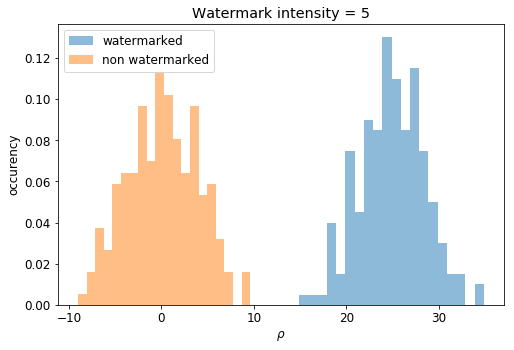

In [205]:
H = lowpass(coords(X.shape),50,80)
stats_w  = []
stats_non_w = []
noise_signal_ratio = 5

for i in range(0,200):
    
    w = noise_signal_ratio*watermark(x.shape, 0.5)
    
    # generate noise
    z = np.random.normal(0,1,x.shape)
    # recived image
    v = x + w + z
    V = np.fft.fft2(v)
    Ve= V*H
    ve = np.fft.ifft2(Ve)
    we = v-np.abs(ve)
    rho = np.sum(we*w)/N_mask
    stats_w.append(rho)

for i in range(0,200):

    w = noise_signal_ratio*watermark(x.shape, 0.5)
    
    # generate noise
    z = np.random.normal(0,1,x.shape)
    # recived image
    v = x + z
    V = np.fft.fft2(v)
    Ve= V*H
    ve = np.fft.ifft2(Ve)
    we = v-np.abs(ve)
    rho = np.sum(we*w)/N_mask
    stats_non_w.append(rho)

    
plt.hist(stats_w, bins=20, alpha=0.5,normed=True, color='C0', label="watermarked")
plt.hist(stats_non_w, bins=20, alpha=0.5,normed=True, color='C1', label="non watermarked")
plt.xlabel(r"$\rho$")
plt.ylabel("occurency")
plt.title(f"Watermark intensity = {noise_signal_ratio}")
plt.legend()
plt.show()

With a watermark intensity of only 1 is very hard distinguish from the noisy images and the watermarked one, however increasing the inteinsity up to 5 will give already very good performance with close to no overlap between the two distribution.

For the **non-blind watermark detector** I'm exepecting much better performances:

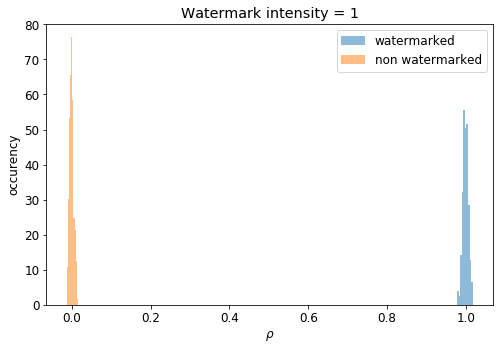

In [166]:
stats_w  = []
stats_non_w = []
noise_signal_ratio = 1

for i in range(0,200):
    w = noise_signal_ratio*watermark(x.shape, 0.5)

    
    # generate noise
    z = np.random.normal(0,1,x.shape)
    # recived image
    v = x + w + z
   
    we = v-x
    rho = np.sum(we*w)/N_mask
    stats_w.append(rho)

for i in range(0,200):
    w = noise_signal_ratio*watermark(x.shape, 0.5)


    # generate noise
    z = np.random.normal(0,1,x.shape)
    # recived image
    v = x + z
    we = v-x
    rho = np.sum(we*w)/N_mask
    stats_non_w.append(rho)

    
plt.hist(stats_w, bins=10, alpha=0.5,normed=True, color='C0', label="watermarked")
plt.hist(stats_non_w, bins=10, alpha=0.5,normed=True, color='C1', label="non watermarked")
plt.xlabel(r"$\rho$")
plt.ylabel("occurency")
plt.title(f"Watermark intensity = {noise_signal_ratio}")
plt.legend()
plt.show()

The difference of performance between the **blind** and **non-blind** detectors are remarkables, to stress the system I then tied to increase the noise:

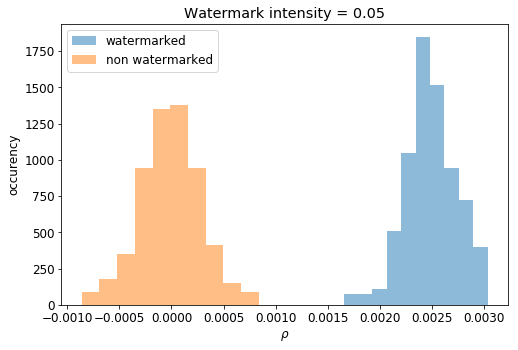

In [167]:
stats_w  = []
stats_non_w = []
noise_signal_ratio = 0.05

for i in range(0,200):
    w = noise_signal_ratio*watermark(x.shape, 0.5)

    
    # generate noise
    z = np.random.normal(0,1,x.shape)
    # recived image
    v = x + w + z
   
    we = v-x
    rho = np.sum(we*w)/N_mask
    stats_w.append(rho)

for i in range(0,200):
    w = noise_signal_ratio*watermark(x.shape, 0.5)


    # generate noise
    z = np.random.normal(0,1,x.shape)
    # recived image
    v = x + z
    we = v-x
    rho = np.sum(we*w)/N_mask
    stats_non_w.append(rho)

    
plt.hist(stats_w, bins=10, alpha=0.5,normed=True, color='C0', label="watermarked")
plt.hist(stats_non_w, bins=10, alpha=0.5,normed=True, color='C1', label="non watermarked")
plt.xlabel(r"$\rho$")
plt.ylabel("occurency")
plt.title(f"Watermark intensity = {noise_signal_ratio}")
plt.legend()
plt.show()

It results that the **blind** and **non-blind** detector have similar performance with a difference of watermark intensity of a factor 100 (intensity 0.05 is equivalent to 5).

As final test  I wanted to see how the detectors performs with image watermarked with a different watermark that the one tested:


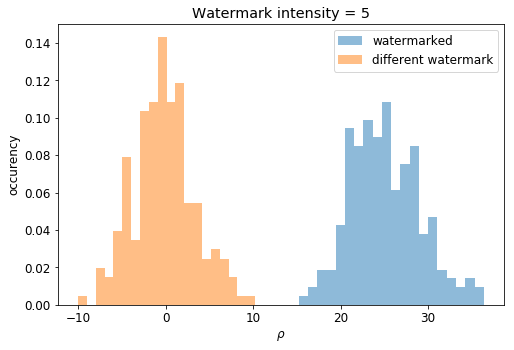

In [206]:
H = lowpass(coords(X.shape),50,80)
stats_w  = []
stats_non_w = []
noise_signal_ratio = 5

for i in range(0,200):
    
    w = noise_signal_ratio*watermark(x.shape, 0.5)
    
    # generate noise
    z = np.random.normal(0,1,x.shape)
    # recived image
    v = x + w + z
    V = np.fft.fft2(v)
    Ve= V*H
    ve = np.fft.ifft2(Ve)
    we = v-np.abs(ve)
    rho = np.sum(we*w)/N_mask
    stats_w.append(rho)

for i in range(0,200):

    w = noise_signal_ratio*watermark(x.shape, 0.5)
    w1 = noise_signal_ratio*watermark(x.shape, 0.5)

    # generate noise
    z = np.random.normal(0,1,x.shape)
    # recived image
    v = x + z + w1
    V = np.fft.fft2(v)x
    Ve= V*H
    ve = np.fft.ifft2(Ve)
    we = v-np.abs(ve)
    rho = np.sum(we*w)/N_mask
    stats_non_w.append(rho)

    
plt.hist(stats_w, bins=20, alpha=0.5,normed=True, color='C0', label="watermarked")
plt.hist(stats_non_w, bins=20, alpha=0.5,normed=True, color='C1', label="different watermark")
plt.xlabel(r"$\rho$")
plt.ylabel("occurency")
plt.title(f"Watermark intensity = {noise_signal_ratio}")
plt.legend()
plt.show()

As I was expecting there is no much difference between noise and a false watermark for the detector as the two watermarks are indipendent, $w_0\perp w_1$.